In [1]:
# IMPORTING MODULES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df=pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#STATISTICAL ANALYSIS
print(df.shape)
df.describe()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
#CONVERTING CATEGORICAL COLUMNS TO NUMERICAL COLUMNS
from sklearn.preprocessing import LabelEncoder
label_encode=LabelEncoder()
labels=label_encode.fit_transform(df.Species)
df['Species_number']=labels
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
#SPLITTING DATA INTO TRAINING AND TESTING
X=df.drop(columns=["Species","Species_number"],axis=1)
y=df.Species_number
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

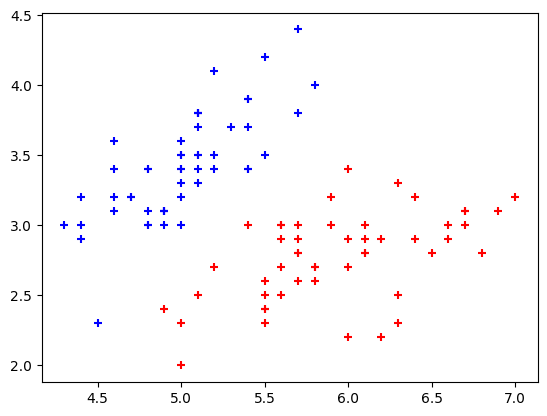

In [6]:
#PLOTTING THE DATA
df0=df[df.Species_number==0]
df1=df[df.Species_number==1]
df2=df[df.Species_number==2]
plt.scatter(df0['SepalLengthCm'],df0['SepalWidthCm'],marker='+',color='b')
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],marker='+',color='r')

In [7]:
#USING SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9666666666666667

In [8]:
#BUILDING A PREDICTION MODEL
t=(51,7.0,3.2,4.7,1.4)
nparr=np.asarray(t)
nparr2=nparr.reshape(1,-1)
prediction=model.predict(nparr2)
if prediction==0:
    print('Iris-setosa')
elif prediction==1:
    print('Iris-versicolor')
elif prediction==2:
    print('Iris-virginica ')

Iris-versicolor


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
